# Amazon Reviews of Digital Video Downloads

In [1]:
import pandas as pd

In [2]:
# Can read parquet, can read CSV/excel
movie_reviews = pd.read_parquet('../data/review_data')

# data frame - basically a table consisting of rows, columns and an index
movie_reviews.shape
movie_reviews.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,product_category
0,US,42778291,R36DE7C83302X,B0034GY4L8,652273641,Big Eden,4,1,1,N,Y,big eden,I liked this video and it appears that everyon...,2012-06-29,2012,Digital_Video_Download
1,US,51900780,R264BJL39GBDF8,B00FJTYDKK,255137298,The Croods,3,0,2,N,Y,3-stars only because of Nicolas Cage,"Cast is awesome, but seriously...I can't stand...",2014-04-09,2014,Digital_Video_Download
2,US,50549774,RZ43SQJAS1IV6,B006MW3V6U,682981764,Downton Abbey Season 2,5,0,0,N,Y,Season 2 Downton Abby,The purchase and viewing process for the Fire ...,2012-06-29,2012,Digital_Video_Download
3,US,13886817,R2WP035BBNAQBZ,B00I3MNJZ0,47146773,The After,1,1,2,N,N,Way too long and obvious,So this is after the RAPTURE? After some EVENT...,2014-04-09,2014,Digital_Video_Download
4,US,51177115,R2HRSJ5OWRLKKF,B006LZSF8M,175214460,Vegucated,5,2,3,N,Y,"A disturbing but ""gentle"" view on why be a veg...",I really enjoyed this film. I was a pesco-ovo-...,2012-06-29,2012,Digital_Video_Download


## Looking at specific data

In [3]:
# Only look at product titles
movie_reviews["product_title"]

# How select specific data using the index
movie_reviews.loc[2]

# .loc is like coordinates - takes the index and column (product_title)
movie_reviews.loc[2, "product_title"]

'Downton Abbey Season 2'

In [4]:
# Changing that entry

movie_reviews.loc[2, "product_title"] = "The Smurfs"
movie_reviews.loc[2, "product_title"]

'The Smurfs'

In [5]:
# Look at some reviews
movie_reviews[["product_title", "star_rating"]]

,product_title,star_rating
0,Big Eden,4
1,The Croods,3
2,The Smurfs,5
3,The After,1
4,Vegucated,5
...,...,...
5173738,Captain Phillips,5
5173739,Gravity,5
5173740,Rise Of The Planet Of The Apes,1
5173741,The Pandorica Opens,1


In [6]:
# Which TV show or movie has the most reviews
movie_reviews.value_counts("product_title")

product_title
Pilot                                         60086
Bosch Season 1                                53164
Downton Abbey Season 3                        47566
Downton Abbey Season 2                        28383
Orphan Black Season 1                         26374
                                              ...  
Mad Max: Fury Road (Trailer 1)                    1
Mad Max: Fury Road - Clip: Attacked               1
Mad Max: Fury Road - Clip: Furiosa                1
Mad Max: Fury Road - Clip: He Looked At Me        1
［リミット］ (字幕版)                                      1
Length: 93536, dtype: int64

In [7]:
# Changing Season -> Series
movie_reviews["product_title"] = movie_reviews["product_title"].str.replace("Season", "Series")
movie_reviews.value_counts("product_title")

product_title
Pilot                                         60086
Bosch Series 1                                53164
Downton Abbey Series 3                        47566
Downton Abbey Series 2                        28383
Orphan Black Series 1                         26374
                                              ...  
Mad Max: Fury Road (Trailer 1)                    1
Mad Max: Fury Road - Clip: Attacked               1
Mad Max: Fury Road - Clip: Furiosa                1
Mad Max: Fury Road - Clip: He Looked At Me        1
［リミット］ (字幕版)                                      1
Length: 93532, dtype: int64

In [8]:
# Filtering out 'Pilot'
is_not_pilot_review_bool = movie_reviews["product_title"] != "Pilot"
movie_reviews = movie_reviews[is_not_pilot_review_bool]
movie_reviews.value_counts("product_title")

product_title
Bosch Series 1                                53164
Downton Abbey Series 3                        47566
Downton Abbey Series 2                        28383
Orphan Black Series 1                         26374
Downton Abbey Series 4                        26000
                                              ...  
Mad Max: Fury Road (Trailer 1)                    1
Mad Max: Fury Road - Clip: Attacked               1
Mad Max: Fury Road - Clip: Furiosa                1
Mad Max: Fury Road - Clip: He Looked At Me        1
［リミット］ (字幕版)                                      1
Length: 93531, dtype: int64

In [9]:
movie_reviews["product_title"] = movie_reviews["product_title"].str.replace("Series", "Season")
movie_reviews.value_counts("product_title")

product_title
Bosch Season 1                                53164
Downton Abbey Season 3                        47566
Downton Abbey Season 2                        28383
Orphan Black Season 1                         26374
Downton Abbey Season 4                        26000
                                              ...  
Mad Max: Fury Road (Trailer 1)                    1
Mad Max: Fury Road - Clip: Attacked               1
Mad Max: Fury Road - Clip: Furiosa                1
Mad Max: Fury Road - Clip: He Looked At Me        1
［リミット］ (字幕版)                                      1
Length: 93531, dtype: int64

In [10]:
# all reviews
movie_reviews.groupby("product_title").mean()
# movie_reviews.groupby("product_title").agg("mean")
# movie_reviews.groupby("product_title").agg({"star_rating": "mean"})
movie_reviews.groupby("product_title").agg({"star_rating": "mean"}).sort_values(by="star_rating", ascending=False)
movie_reviews.groupby("product_title").agg({"star_rating": ["mean", "count"]}).sort_values(by=("star_rating", "count"), ascending=False)

star_rating       
                                                  mean  count
product_title                                                
Bosch Season 1                                4.606124  53164
Downton Abbey Season 3                        4.873775  47566
Downton Abbey Season 2                        4.892259  28383
Orphan Black Season 1                         4.682794  26374
Downton Abbey Season 4                        4.836692  26000
...                                                ...    ...
Mad Max: Fury Road (Trailer 1)                5.000000      1
Mad Max: Fury Road - Clip: Attacked           5.000000      1
Mad Max: Fury Road - Clip: Furiosa            5.000000      1
Mad Max: Fury Road - Clip: He Looked At Me    5.000000      1
［リミット］ (字幕版)                                  1.000000      1

[93531 rows x 2 columns]

In [11]:
# Most well rated TV show or movie
# movie_reviews.groupby("product_title").mean()
# movie_reviews.groupby("product_title").agg({"star_rating": "mean"})
# movie_reviews.groupby("product_title").agg({"star_rating": "mean"}).sort_values(by="star_rating", ascending=False)
movie_reviews.groupby("product_title").agg({"star_rating": ["mean", "count"]}).sort_values(by=("star_rating", "count"), ascending=False)

star_rating       
                                                  mean  count
product_title                                                
Bosch Season 1                                4.606124  53164
Downton Abbey Season 3                        4.873775  47566
Downton Abbey Season 2                        4.892259  28383
Orphan Black Season 1                         4.682794  26374
Downton Abbey Season 4                        4.836692  26000
...                                                ...    ...
Mad Max: Fury Road (Trailer 1)                5.000000      1
Mad Max: Fury Road - Clip: Attacked           5.000000      1
Mad Max: Fury Road - Clip: Furiosa            5.000000      1
Mad Max: Fury Road - Clip: He Looked At Me    5.000000      1
［リミット］ (字幕版)                                  1.000000      1

[93531 rows x 2 columns]

In [12]:
# Looking more closely at Bosch Season 1 ratings

is_bosch_review_bool = movie_reviews["product_title"] == "Bosch Season 1"
movie_reviews.loc[is_bosch_review_bool, "star_rating"].value_counts().describe()

count        5.000000
mean     10632.800000
std      15847.437433
min        562.000000
25%        768.000000
50%       2298.000000
75%      11792.000000
max      37744.000000
Name: star_rating, dtype: float64

<AxesSubplot:ylabel='star_rating'>

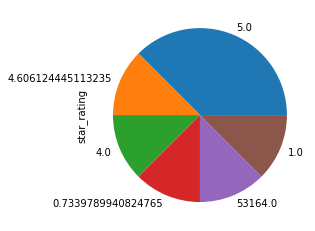

In [13]:
movie_reviews.loc[is_bosch_review_bool, "star_rating"].describe().value_counts().plot.pie()

In [14]:
# Calculate the average star rating, helpful votes and total votes each year
movie_reviews.groupby("year").agg({"star_rating": "mean"})

,star_rating
year,
2000,2.000000
2001,3.000000
2002,4.166667
2003,3.500000
2004,4.857143
2005,3.733333
2006,3.631579
2007,3.594483
2008,3.759020


<AxesSubplot:xlabel='year'>

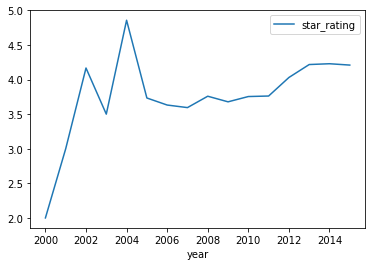

In [15]:
movie_reviews.groupby("year").agg({"star_rating": "mean"}).plot()

In [16]:
# Looking at the total number of reviews across the years
movie_reviews["year"].value_counts().sort_index()

2000          1
2001          1
2002          6
2003          4
2004          7
2005         15
2006        228
2007       2900
2008       3631
2009       3680
2010       7569
2011      26928
2012     199378
2013     948409
2014    1983444
2015    1937456
Name: year, dtype: int64

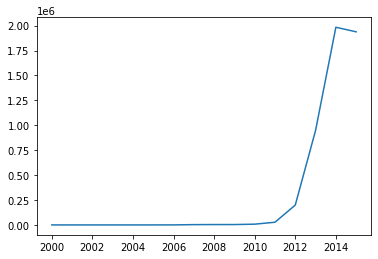

In [17]:
plot = movie_reviews["year"].value_counts().sort_index().plot()

In [18]:
fig = plot.get_figure()
fig.savefig("output.png")